## **Task**

Here we have some data about health insurance. Stakeholders provide us data with task of analysis and predictive modeling of insurance price based on provided features.

In this notebook we will try to completly analyze provided data, try to find insights and create some visualizations to gain better technical / statistical understanding of data provided.

This dataset was founded on Kaggle. [dataset online](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [ ]:
# some imports of packages needed
# for data exploration and visualization
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# first things first: let's get our data and look and it.
data_path = "/content/drive/MyDrive/Data Analyst Pet Project/Data/insurance.csv"

df = pd.read_csv(data_path)

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here we see that we have six independet features: `age, sex, bmi, children, smoker, region`. And one dependent: `charges`.

* `age` - discrete variable. (integer); Age of the person.
* `sex` - categorical variable. (string); Sex of the person.
* `bmi` - continuous variable. (float); Body mass index, providing an understanding of body, weights that are relatively high or low relative to height.
* `children` - categorical variable. (integer); Number of children covered in insurance.
* `smoker` - categorical variable. (string); If person has a smoking habit. 
* `region` - categorical variable. (string); Residential area (US).
* `charges` - continuous variable. (float); Individual medical costs billed by health insurance.

More info can be found [by link](https://www.kaggle.com/datasets/mirichoi0218/insurance)

## **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We see there are no null values across whole dataset.

### Variables represented in numbers

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* From the table above we can say, that major part of customers are in age between **27** and **51**.
* Oldest customers are age of **64**. That is not that old, and it is suspicious, maybe company could target more elder people. And the minimum age is obviously **18** years old.
* Most charges were between 4740 and 16639, that is a big spread and moreover we see that maximum value is pretty far from that range reaching barely 64000. And median is pretty below mean value, tha indicates of potential outliers in dataset.

This information is helpfull for general understanding of data, but table above do not cover categorical variables. We will explore them a bit later.

In [ ]:
print("'Children' mode:", stats.mode(df["children"]).mode[0])

'Children' mode: 0


From the aline above we can make an inference that most of our customers have no children, it is an important point.


### Scatter plots

The next step in analysing numerical features is visualisation of distributions with plots and diagrams.

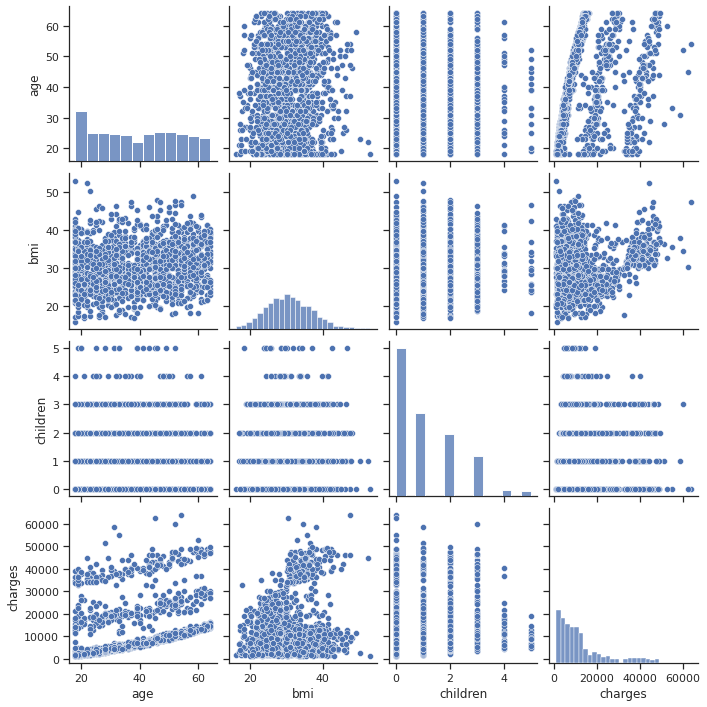

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()

By looking at this pairplot we can see clearly that there are clear three clusters in `age` to `charges` plot, that is very interesting distribution. And there are even moore, we see approximately two clusters in `bmi` to `charges` plot. And predictably `bmi` is normaly distributed, but `charges` looks exponentialy.

But, let's look a bit closely.

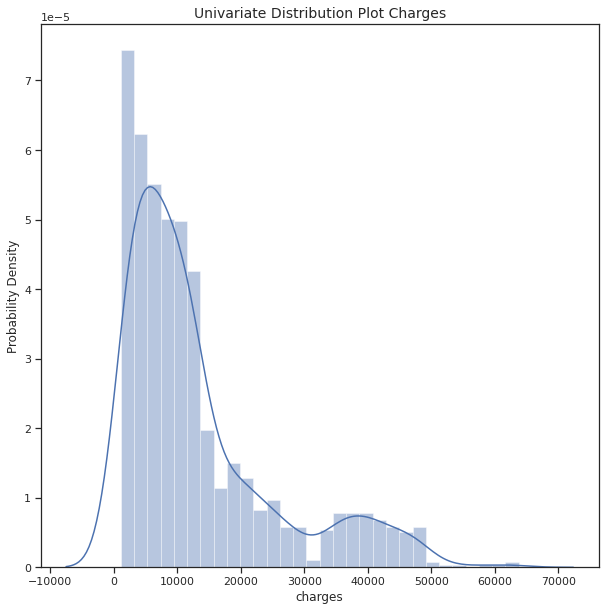

In [ ]:
# set fixed size for this plot and for all future plots
plt.rcParams["figure.figsize"] = [10, 10]
# create probability density function with histogram
plt.title('Univariate Distribution Plot Charges', fontdict={'fontsize': 14})
sns.distplot(df['charges'], norm_hist=False)
plt.ylabel('Probability Density')
plt.show()

Distribution is not normal, looking exponential or log-normal, and we see few outliers in right tail of distribution.

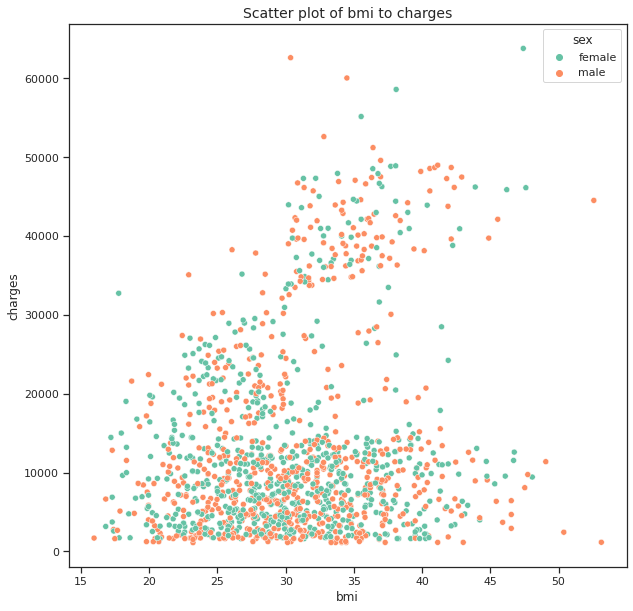

In [ ]:
plt.title('Scatter plot of bmi to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='bmi', y='charges', data=df, hue="sex", palette="Set2")
plt.show()

Here we see 2-3 clusters, but applying `sex` as a hue do not provide any useful data.

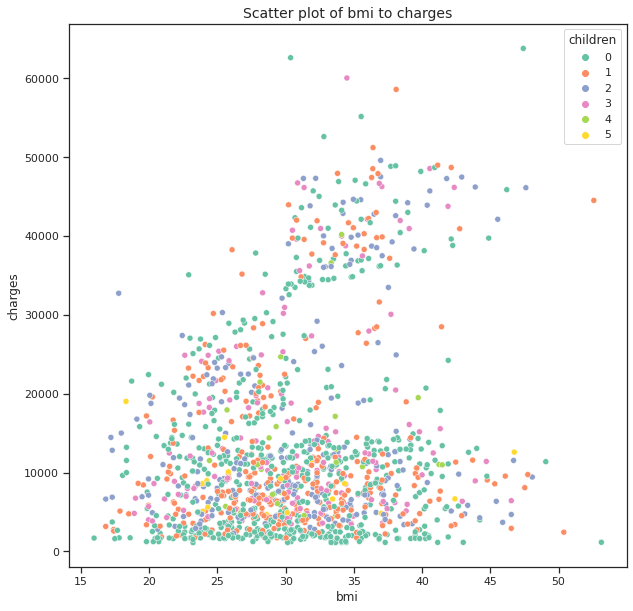

In [ ]:
plt.title('Scatter plot of bmi to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='bmi', y='charges', data=df, hue="children", palette="Set2")
plt.show()

Children as a hue do not provide anything obvious relations too,

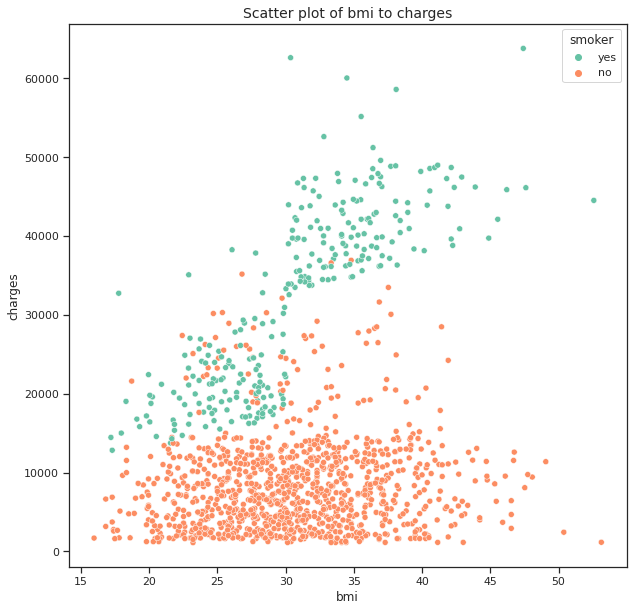

In [ ]:
plt.title('Scatter plot of bmi to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='bmi', y='charges', data=df, hue="smoker", palette="Set2")
plt.show()

Here see approximately 3 clusters, two of them in majority consit of smokers, and one of them absolutely consist of non-smokers. We should count this in.

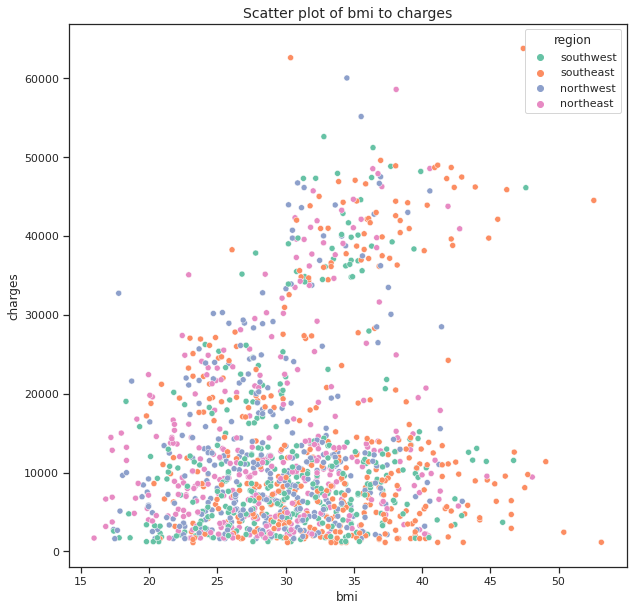

In [ ]:
plt.title('Scatter plot of bmi to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='bmi', y='charges', data=df, hue="region", palette="Set2")
plt.show()

Region as a hue do not provide any insights from this diagram.

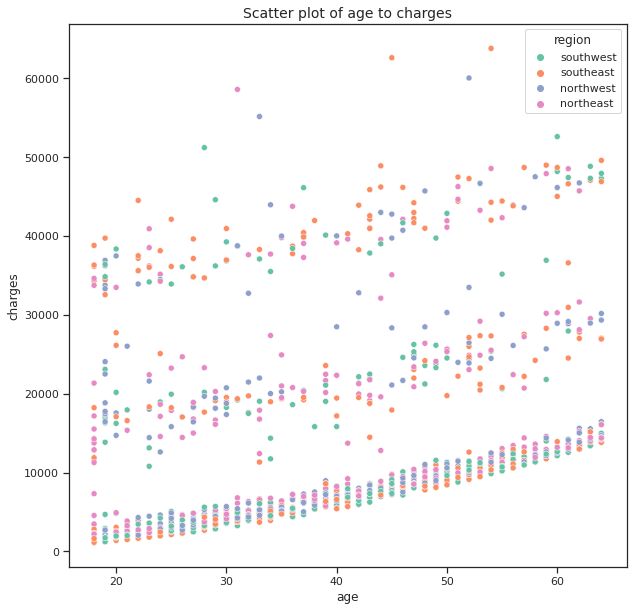

In [ ]:
plt.title('Scatter plot of age to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='age', y='charges', data=df, hue="region", palette="Set2")
plt.show()

Here we see 3 clear clusters that shows linear relation of age to charges, it might be suetable to build three linear predictive models for this kind of data. But region as a hue gives us nothing.

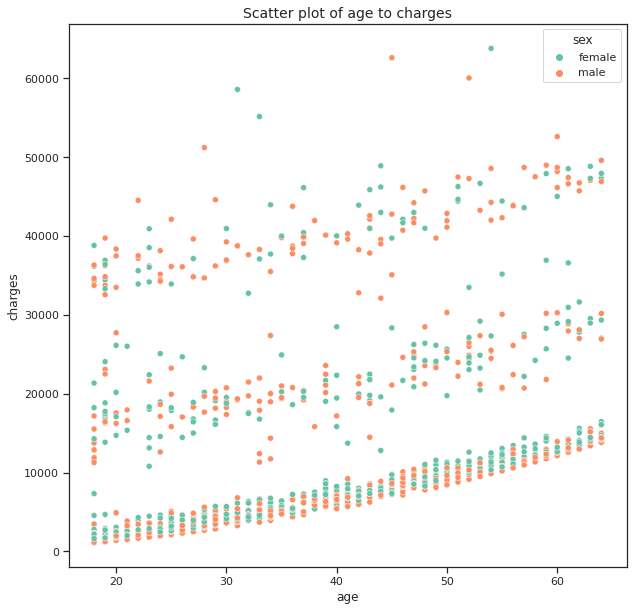

In [ ]:
plt.title('Scatter plot of age to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='age', y='charges', data=df, hue="sex", palette="Set2")
plt.show()

Sex as a hue gives us nothing useful, except that we see uniform distribution by sex inside clusters.

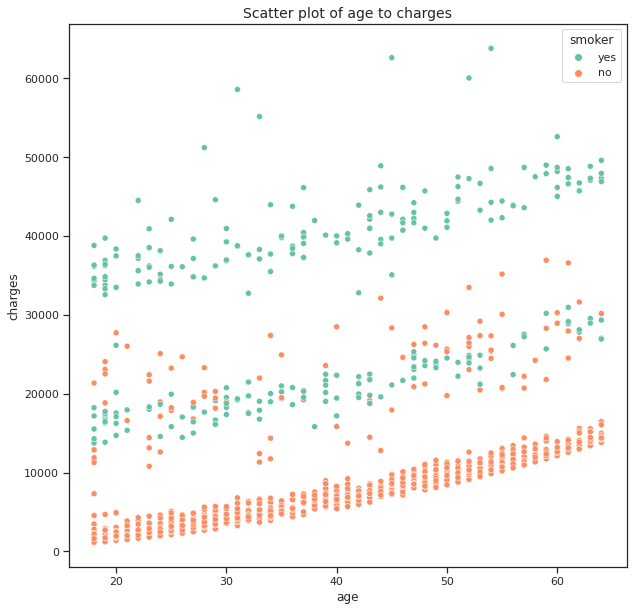

In [ ]:
plt.title('Scatter plot of age to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='age', y='charges', data=df, hue="smoker", palette="Set2")
plt.show()

As mentioned earlier, we have 3 clusters, two of them are very clear within their smoker status, but cluster in the middle looks like a sparse mix of smoker/not-smoker class.

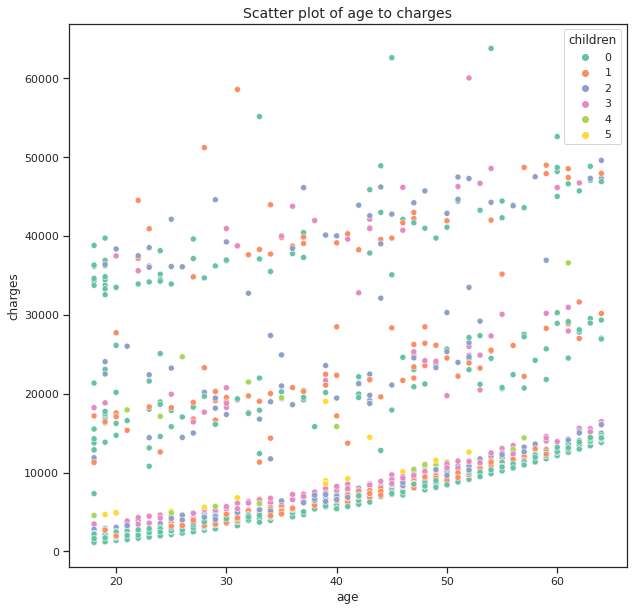

In [ ]:
plt.title('Scatter plot of age to charges', fontdict={'fontsize': 14})
sns.scatterplot(x='age', y='charges', data=df, hue="children", palette="Set2")
plt.show()

Children as a hue gives us no insights.

### Boxplots

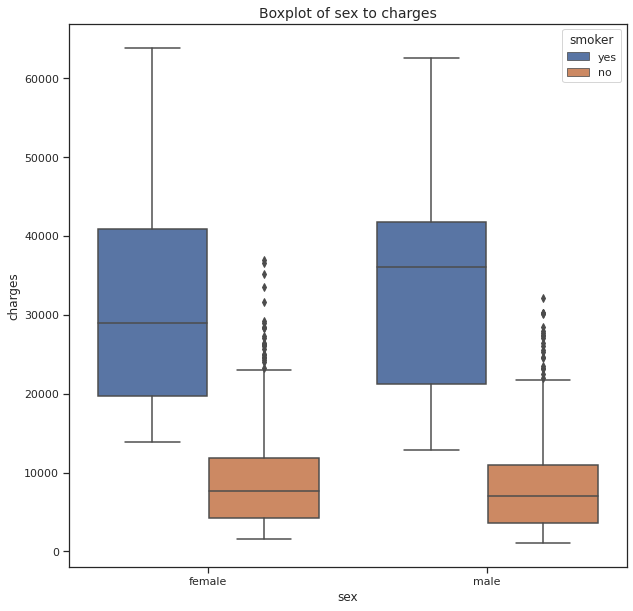

In [ ]:
plt.title('Boxplot of sex to charges', fontdict={'fontsize': 14})
sns.boxplot(x="sex", y="charges", hue="smoker", data=df)
plt.show()

* Interstingly, that distribution of smoker and non-smoker are visualy significantly different, overal distribution looks barely same for males and females except median. 

* Men have higher median that might be a sign that they spend more money on insurance.

* This plot clearly shows that smokers are far more likely to buy health insurance so they might be more valuable clients for company.

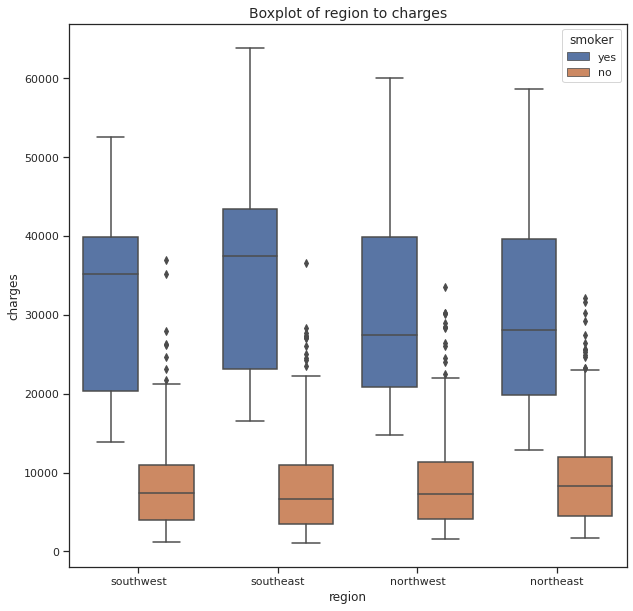

In [ ]:
plt.title('Boxplot of region to charges', fontdict={'fontsize': 14})
sns.boxplot(x="region", y="charges", hue="smoker", data=df)
plt.show()

Within each country region distribution looks pretty same, except with lower median at north in smoker class.

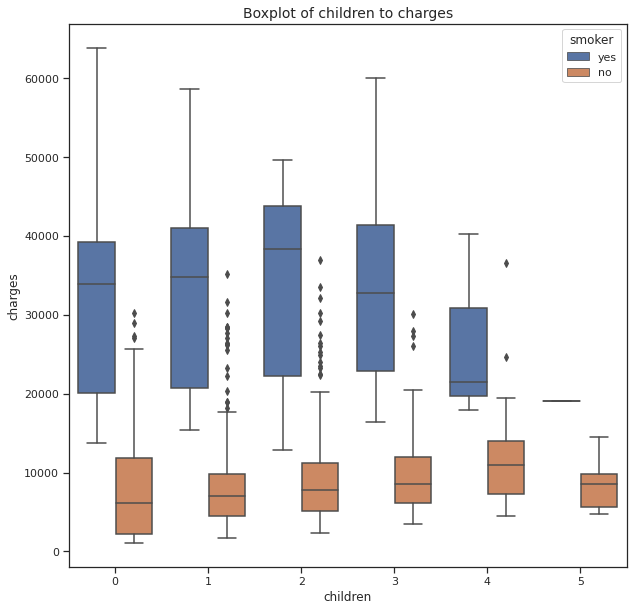

In [ ]:
plt.title('Boxplot of children to charges', fontdict={'fontsize': 14})
sns.boxplot(x="children", y="charges", hue="smoker", data=df)
plt.show()

Her we see that there are no smokers with 5 clidren, and lower rate comparing with others in smoker class with 4 children.

### Correlation diagram

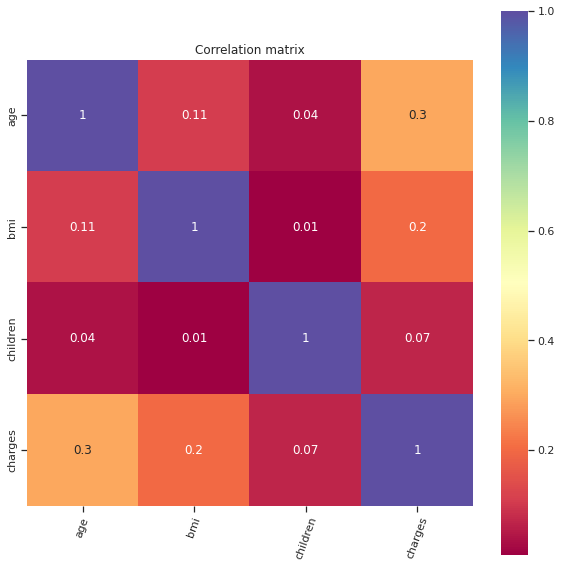

In [ ]:
corr = df[['age', 'bmi', 'children', 'charges']].corr().round(2)
plt.title('Correlation matrix')
sns.heatmap(corr, square=True, cmap='Spectral', annot=True)
plt.xticks(rotation=70)
plt.show()

We dont see any strong linear relationships between those numerical varibles, but as mentioned earlier, it might be linear relations within cluster region of dataset.



---



### Categorical Data

Let's take a look at variables not covered above. In my opinion the best tool to do that is to crate visualisation.

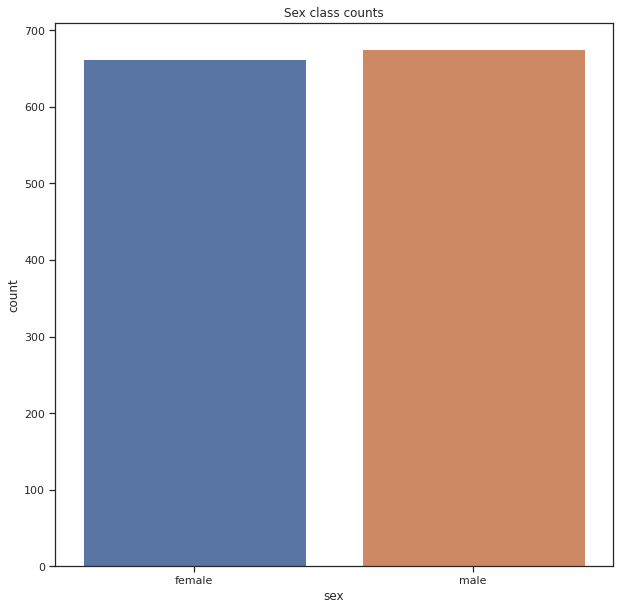

In [ ]:
sns.countplot(x='sex', data=df)
plt.title('Sex class counts')
plt.show()

We see equal number of males and females in our distribution.

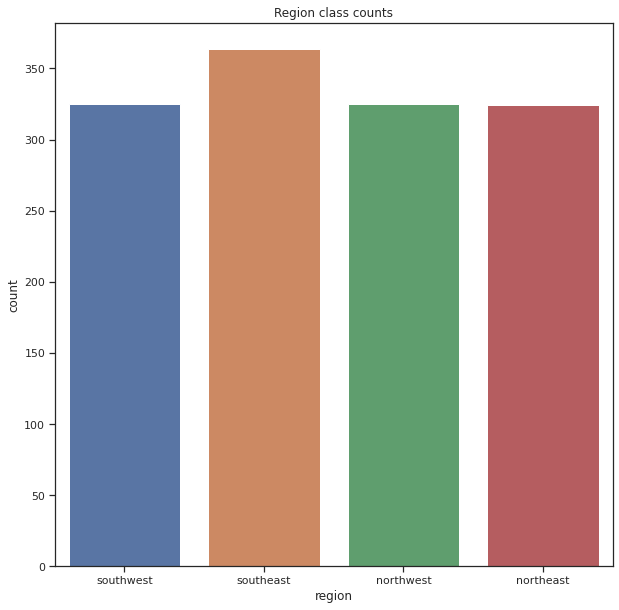

In [ ]:
sns.countplot(x='region', data=df)
plt.title('Region class counts')
plt.show()

Distridution by region is pretty uniform too.

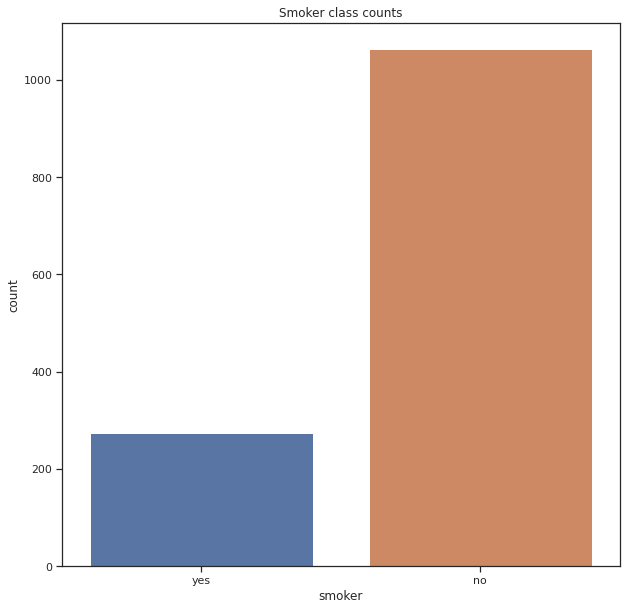

In [ ]:
sns.countplot(x='smoker', data=df)
plt.title('Smoker class counts')
plt.show()

There is significant amount of non-smokers in dataset. But this makes smokers much more vital customers for company, because they tend to spend more money.

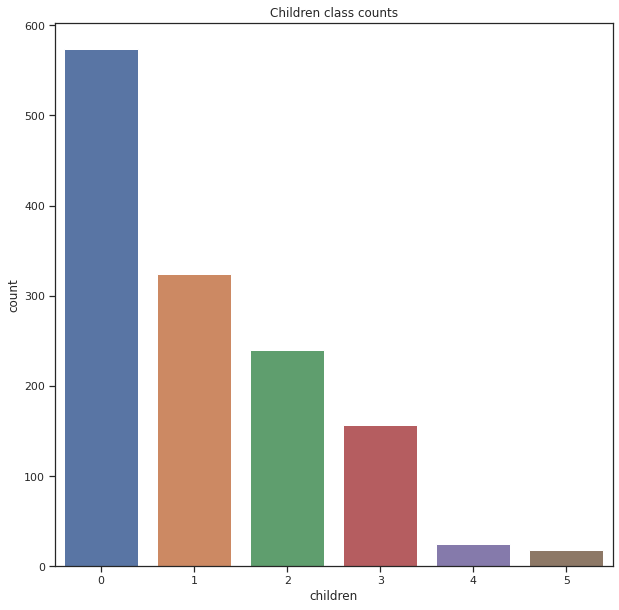

In [ ]:
sns.countplot(x='children', data=df)
plt.title('Children class counts')
plt.show()

This looks like exponential decreasing in a number of clients children count, but as we see the majority of clients have no children at all, another group is varies from 1 to 3 children, and another small group counts 4 or five children in family.